<h1 style="color: white; 
    font-size: 46px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px; 
    ">Image Multi-Class Classification</h1>

In [3]:
#!pip install tensorflow==2.0.0-alpha0 

import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Load the data</h1>

- Name: Rock Paper Scissors

- By: Laurence Moroney

- Source: http://www.laurencemoroney.com/rock-paper-scissors-dataset/

- Images:
    - 2,892 images of diverse hands in Rock/Paper/Scissors poses
    - 300×300 pixels in 24-bit color

- Description: Rock Paper Scissors contains images from a variety of different hands,  from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images.

Notebook: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=LWTisYLQM1aM

Have a look at my final exercise!

In [4]:
TRAIN_DATA_URLS = ['https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip']
TRAIN_DIR_NAME = 'rock-paper-scissors'
    
TRAIN_DATA_FILE_EXT = '.zip'
TRAIN_DATA_DIR_PATH = './data/' + TRAIN_DIR_NAME

In [5]:
VAL_DATA_URLS = ['https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip']
VAL_DIR_NAME = 'rock-paper-scissors-validation'
    
VAL_DATA_FILE_EXT = '.zip'
VAL_DATA_DIR_PATH = './data/' + VAL_DIR_NAME

In [6]:
# !pip install wget

import os
import wget
import zipfile
import tarfile

def download_wget(URLS, FILE_EXT, DIR_PATH):
    for url in URLS:
        target_file = url.split('/')[-1]
        if target_file not in os.listdir(DIR_PATH):
            print('Downloading', url)
            wget.download(url, out=DIR_PATH)
            file_path = os.path.join(DIR_PATH, target_file)
            
            print('\n \nExtracting files from', file_path)
            if FILE_EXT == '.zip':
                zip_ref = zipfile.ZipFile(file_path,'r')
                zip_ref.extractall(DIR_PATH)
                zip_ref.close()
                os.remove(file_path)
            elif FILE_EXT == '.tar.gz':
                tar_ref = tarfile.open(file_path,'r:gz')
                tar_ref.extractall(DIR_PATH)
                tar_ref.close()
                os.remove(file_path)
            elif FILE_EXT == '.tar.bz2':
                tar_ref = tarfile.open(file_path,'r:bz2')
                tar_ref.extractall(DIR_PATH)
                tar_ref.close()
                os.remove(file_path)
            print('\nDone!')
        else:
            print('Already downloaded', url)

In [7]:
if not os.path.isdir('data'):
    os.mkdir('data')    
    
if not os.path.isdir('data/' + TRAIN_DIR_NAME):
    os.mkdir('data/' + TRAIN_DIR_NAME)              

if not os.path.isdir('data/' + VAL_DIR_NAME):
    os.mkdir('data/' + VAL_DIR_NAME) 
    
    
download_wget(TRAIN_DATA_URLS, TRAIN_DATA_FILE_EXT, TRAIN_DATA_DIR_PATH)
    
download_wget(VAL_DATA_URLS, VAL_DATA_FILE_EXT, VAL_DATA_DIR_PATH)

100% [..................................................] 200682221 / 200682221
 
Extracting files from ./data/rock-paper-scissors\rps.zip

Done!
100% [....................................................] 29516758 / 29516758
 
Extracting files from ./data/rock-paper-scissors-validation\rps-test-set.zip

Done!


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Visualize the data</h1>

In [8]:
# Create variables with the names of the directories
class1 = 'rock'
class2 = 'paper'
class3 = 'scissors'

train_dir = TRAIN_DIR_NAME
validation_dir = VAL_DIR_NAME

train_dir_path = './data/'+ train_dir + '/'
validation_dir_path = './data/'+ validation_dir + '/'

# Directories with the training images
train_class1_dir = os.path.join('./data/'+ train_dir + '/' + class1)
train_class2_dir = os.path.join('./data/'+ train_dir + '/' + class2)
train_class3_dir = os.path.join('./data/'+ train_dir + '/' + class3)

# Directories with the validation images
validation_class1_dir = os.path.join('./data/'+ validation_dir + '/' + class1)
validation_class2_dir = os.path.join('./data/'+ validation_dir + '/' + class2)
validation_class3_dir = os.path.join('./data/'+ validation_dir + '/' + class3)

In [10]:
# See what the file names look like
print('File names:')

train_class1_names = os.listdir(train_class1_dir)
print(train_class1_names[:5])

train_class2_names = os.listdir(train_class2_dir)
print(train_class2_names[:5])

train_class3_names = os.listdir(train_class3_dir)
print(train_class3_names[:5])

validation_class1_names = os.listdir(validation_class1_dir)
print(validation_class1_names[:5])

validation_class2_names = os.listdir(validation_class2_dir)
print(validation_class2_names[:5])

validation_class3_names = os.listdir(validation_class3_dir)
print(validation_class3_names[:5])

File names:
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png']
['testrock01-00.png', 'testrock01-01.png', 'testrock01-02.png', 'testrock01-03.png', 'testrock01-04.png']
['testpaper01-00.png', 'testpaper01-01.png', 'testpaper01-02.png', 'testpaper01-03.png', 'testpaper01-04.png']
['testscissors01-00.png', 'testscissors01-01.png', 'testscissors01-02.png', 'testscissors01-03.png', 'testscissors01-04.png']


In [11]:
# Total number of training pictures
print('\nTotal training ' + class1 + ' images:', len(os.listdir(train_class1_dir)))
print('Total training ' + class2 + ' images:', len(os.listdir(train_class2_dir)))
print('Total training ' + class3 + ' images:', len(os.listdir(train_class3_dir)))

# Total number of training pictures
print('\nTotal validation ' + class1 + ' images:', len(os.listdir(validation_class1_dir)))
print('Total validation ' + class2 + ' images:', len(os.listdir(validation_class2_dir)))
print('Total validation ' + class3 + ' images:', len(os.listdir(validation_class3_dir)))


Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840

Total validation rock images: 124
Total validation paper images: 124
Total validation scissors images: 124


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

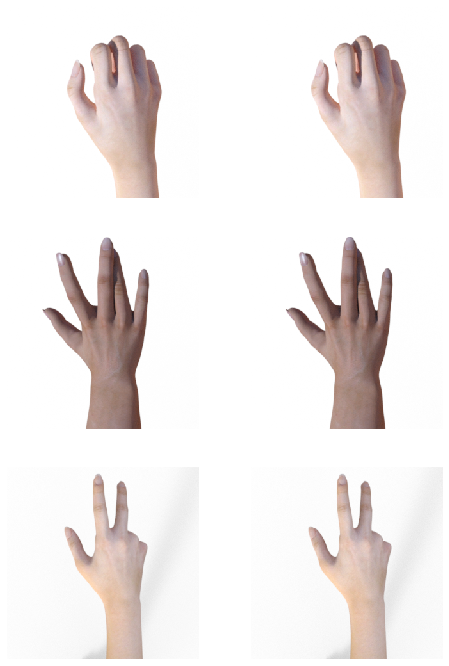

In [16]:
# Parameters for the graph, we'll output images in a 3x2 configuration
nrows = 3
ncols = 2

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index = 2

next_class1_pix = [os.path.join(train_class1_dir, fname) 
                for fname in train_class1_names[pic_index-2:pic_index]]

next_class2_pix = [os.path.join(train_class2_dir, fname) 
                for fname in train_class2_names[pic_index-2:pic_index]]

next_class3_pix = [os.path.join(train_class3_dir, fname) 
                for fname in train_class3_names[pic_index-2:pic_index]]

for i, img_path in enumerate(next_class1_pix+next_class2_pix+next_class3_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Preprocess the data</h1>

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if not train_dir_path:
    train_dir_path = './data/'+ train_dir + '/'
    validation_dir_path = './data/'+ validation_dir + '/'


training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    train_dir_path,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir_path,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">The model</h1>

In [19]:
# images: 150x150 with 3 bytes color

model = tf.keras.models.Sequential([
    
    # Convolutions
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [21]:
history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=20, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3
)

Epoch 1/25
20/20 [==============================] - 222s 11s/step - loss: 1.7179 - accuracy: 0.3583 - val_loss: 1.0753 - val_accuracy: 0.3495
Epoch 2/25
20/20 [==============================] - 219s 11s/step - loss: 1.1444 - accuracy: 0.3901 - val_loss: 1.0566 - val_accuracy: 0.5296
Epoch 3/25
20/20 [==============================] - 223s 11s/step - loss: 1.1265 - accuracy: 0.4706 - val_loss: 0.8485 - val_accuracy: 0.5565
Epoch 4/25
20/20 [==============================] - 204s 10s/step - loss: 0.9724 - accuracy: 0.5429 - val_loss: 0.7933 - val_accuracy: 0.5833
Epoch 5/25
20/20 [==============================] - 202s 10s/step - loss: 0.8496 - accuracy: 0.6020 - val_loss: 0.3340 - val_accuracy: 0.9758
Epoch 6/25
20/20 [==============================] - 306s 15s/step - loss: 0.7696 - accuracy: 0.6508 - val_loss: 0.3786 - val_accuracy: 0.9435
Epoch 7/25
20/20 [==============================] - 305s 15s/step - loss: 0.6589 - accuracy: 0.7071 - val_loss: 0.4238 - val_accuracy: 0.8253
Epoch 

In [22]:
model.save("rps.h5")

<h1 style="color: white; 
    font-size: 23px; 
    text-align: center; 
    background: #ff6e00; 
    padding: 30px;
    ">Make Predictions</h1>

In [28]:
import numpy as np
from keras.preprocessing import image

files = ['rock1.png', 'paper1.png', 'scissors1.png']

for file in files:
    path = './data/predict/' + file 
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0]>0.5:
        print(file + " is " + class1)
    elif classes[0][1]>0.5:
        print(file + " is " + class2)
    else:
        print(file + " is " + class3)
 

[0. 1. 0.]
rock1.png is paper
[0. 1. 0.]
paper1.png is paper
[0. 0. 1.]
scissors1.png is scissors
